In [1]:
# Data Preprocessing
#!pip install wordcloud
import numpy as np 
import pandas as pd 
import re

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('Corona_NLP_train.csv',encoding ='latin1',error_bad_lines=False)
test = pd.read_csv('Corona_NLP_test.csv',encoding ='latin1',error_bad_lines=False)

In [7]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [3]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [125]:
df.shape

(41157, 6)

In [126]:
test.shape

(3798, 6)

### Statistique descriptive 

In [4]:
df.Sentiment.groupby(df['TweetAt']).count()

TweetAt
01-04-2020     630
02-04-2020     954
03-04-2020     810
04-04-2020     767
05-04-2020    1131
06-04-2020    1742
07-04-2020    1843
08-04-2020    1881
09-04-2020    1471
10-04-2020    1005
11-04-2020     909
12-04-2020     803
13-04-2020    1428
14-04-2020     284
16-03-2020     656
17-03-2020    1977
18-03-2020    2742
19-03-2020    3215
20-03-2020    3448
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
24-03-2020    1480
25-03-2020    2979
26-03-2020    1277
27-03-2020     345
28-03-2020      23
29-03-2020     125
30-03-2020      87
31-03-2020     316
Name: Sentiment, dtype: int64

In [5]:
df['DateTime'] = pd.to_datetime(df['TweetAt'],dayfirst=True)

In [6]:
df.Sentiment.groupby(df['DateTime']).count()

DateTime
2020-03-16     656
2020-03-17    1977
2020-03-18    2742
2020-03-19    3215
2020-03-20    3448
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-24    1480
2020-03-25    2979
2020-03-26    1277
2020-03-27     345
2020-03-28      23
2020-03-29     125
2020-03-30      87
2020-03-31     316
2020-04-01     630
2020-04-02     954
2020-04-03     810
2020-04-04     767
2020-04-05    1131
2020-04-06    1742
2020-04-07    1843
2020-04-08    1881
2020-04-09    1471
2020-04-10    1005
2020-04-11     909
2020-04-12     803
2020-04-13    1428
2020-04-14     284
Name: Sentiment, dtype: int64

In [7]:
df.groupby([df['DateTime'].dt.strftime('%B')]).count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,DateTime
DateTime,,,,,,,
April,15658,15658,12492,15658,15658,15658,15658
March,25499,25499,20075,25499,25499,25499,25499


In [8]:
df['DateTime'] = df.DateTime.dt.strftime('%B')

In [9]:
data = df[['UserName','DateTime','Sentiment']]
groupDate = data.groupby(['DateTime','Sentiment']).count()
groupDate.columns = ['Nombre']
groupDate = groupDate.reset_index()
groupDate

,DateTime,Sentiment,Nombre
0,April,Extremely Negative,1877
1,April,Extremely Positive,2630
2,April,Negative,3616
3,April,Neutral,3127
4,April,Positive,4408
5,March,Extremely Negative,3604
6,March,Extremely Positive,3994
7,March,Negative,6301
8,March,Neutral,4586
9,March,Positive,7014


In [10]:
df1= df[['UserName','TweetAt','Sentiment']]
compte = df1.groupby(['TweetAt','Sentiment']).count()
compte

UserName
TweetAt    Sentiment                   
01-04-2020 Extremely Negative        90
           Extremely Positive        89
           Negative                 156
           Neutral                  125
           Positive                 170
...                                 ...
31-03-2020 Extremely Negative        38
           Extremely Positive        48
           Negative                  89
           Neutral                   42
           Positive                  99

[150 rows x 1 columns]

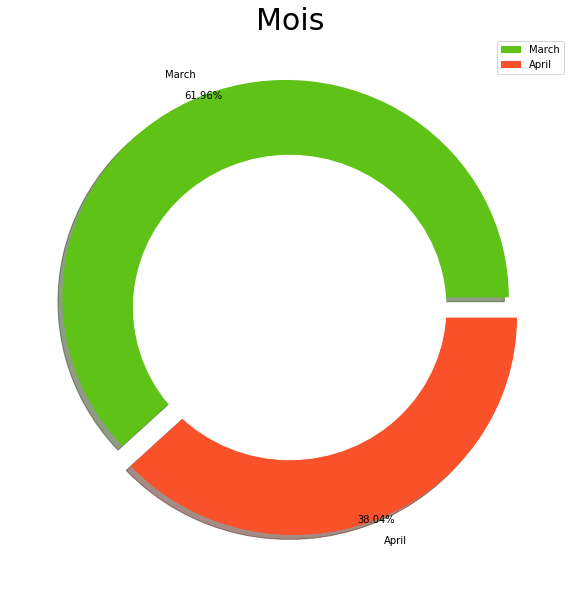

In [12]:
# plotting a donut chart

size = [25499,15658]
colors = ['#5fc317','#f95129']
labels = "March","April" 
explode = [0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title("Mois", fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [135]:
print(df.Sentiment.unique())
print(df.Sentiment.value_counts())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


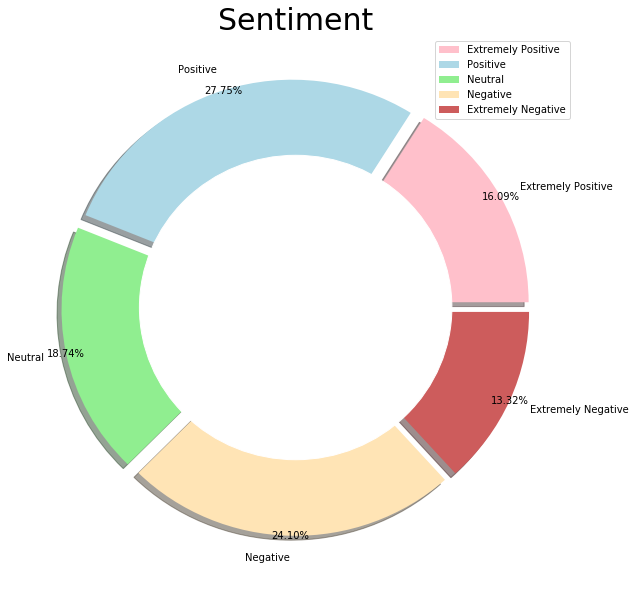

In [136]:
# plotting a donut chart

size = [6624,11422,7713,9917,5481]
colors = ['pink', 'lightblue', 'lightgreen','moccasin','indianred']
labels = "Extremely Positive", "Positive", "Neutral","Negative","Extremely Negative" 
explode = [0.05, 0.05, 0.05,0.05,0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title("Sentiment", fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [14]:
fig=make_subplots(1,2,subplot_titles=('Train set'))
x = df.Sentiment.value_counts()
fig.add_trace(go.Bar(x = x.index,y = x.values,marker_color=['#5fc317','#f95129','#FACA0C','#5fc317','#f95129'],name='train'),row=1,col=1)

In [83]:
data

,UserName,DateTime,Sentiment
0,3799,March,Neutral
1,3800,March,Positive
2,3801,March,Positive
3,3802,March,Positive
4,3803,March,Extremely Negative
...,...,...,...
41152,44951,April,Neutral
41153,44952,April,Extremely Negative
41154,44953,April,Positive
41155,44954,April,Neutral


In [150]:
data['Sentiment'][data['Sentiment']== 'Extremely Positive'] = 'Positive'
data['Sentiment'][data['Sentiment']== 'Extremely Negative'] = 'Negative'

In [152]:
data.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [120]:
data

,UserName,DateTime,Sentiment
0,3799,March,Neutral
1,3800,March,Positive
2,3801,March,Positive
3,3802,March,Positive
4,Negative,Negative,Negative
...,...,...,...
41152,44951,April,Neutral
41153,Negative,Negative,Negative
41154,44953,April,Positive
41155,44954,April,Neutral


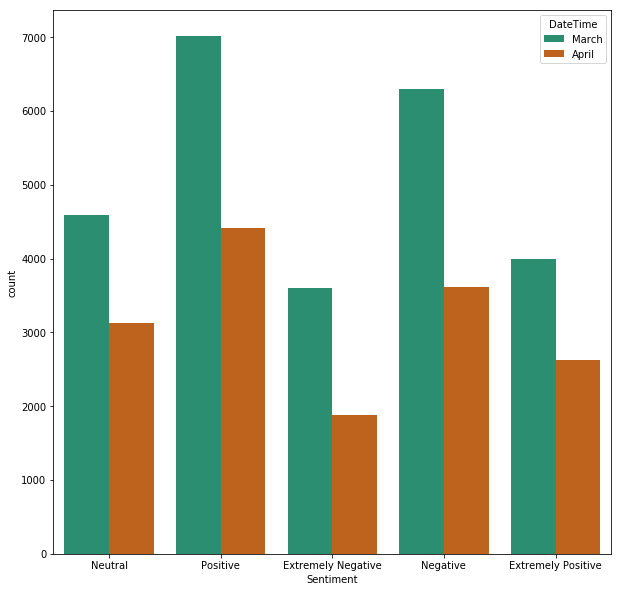

In [22]:
import seaborn as sns
sns.countplot(x = data['Sentiment'], hue = 'DateTime', data = data, palette = 'Dark2')

In [57]:
grouped_df = df.groupby(['DateTime', 'Sentiment'], as_index=False).count()

fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=[
                        'April',  # 1. subplot title
                        'March'  # 2. subplot title
])

fig.add_trace(go.Bar(x=grouped_df[grouped_df['DateTime'] == 'April']['Sentiment'], y=grouped_df[grouped_df['DateTime'] == 'April'], name='April'),row=1, col=1)
fig.add_trace(go.Bar(x=grouped_df[grouped_df['DateTime'] == 'March']['Sentiment'], y=grouped_df[grouped_df['DateTime'] == 'March'], name='March'), row=1, col=2)
fig.show()

In [39]:
grouped_df

,DateTime,Sentiment,UserName,ScreenName
0,April,Extremely Negative,69374960,153749864
1,April,Extremely Positive,98131980,216355740
2,April,Negative,133765446,296311878
3,April,Neutral,116133854,256698758
4,April,Positive,163920497,362068913
5,March,Extremely Negative,56596336,218603344
6,March,Extremely Positive,67756067,247294355
7,March,Negative,103320677,386563229
8,March,Neutral,76677741,282827613
9,March,Positive,117606631,432899959


In [41]:
x1

0    Extremely Negative
1    Extremely Positive
2              Negative
3               Neutral
4              Positive
Name: Sentiment, dtype: object

In [44]:
grouped_df[grouped_df['DateTime'] == 'April']

,DateTime,Sentiment,UserName,ScreenName
0,April,Extremely Negative,69374960,153749864
1,April,Extremely Positive,98131980,216355740
2,April,Negative,133765446,296311878
3,April,Neutral,116133854,256698758
4,April,Positive,163920497,362068913


In [ ]:
fig.update_layout(title='Les sentiments suivant les mois ', title_x=0.9)

In [19]:
data

,UserName,DateTime,Sentiment
0,3799,March,Neutral
1,3800,March,Positive
2,3801,March,Positive
3,3802,March,Positive
4,3803,March,Extremely Negative
...,...,...,...
41152,44951,April,Neutral
41153,44952,April,Extremely Negative
41154,44953,April,Positive
41155,44954,April,Neutral


## Nettoyage de la base 

In [153]:
data = df[['OriginalTweet']]
data['index'] = data.index
documents = data

In [154]:
print(len(documents))
print(documents[:5])

41157
                                       OriginalTweet  index
0                                          and  and       0
1  advice Talk to your neighbours family to excha...      1
2  Coronavirus Australia: Woolworths to give elde...      2
3  My food stock is not the only one which is emp...      3
4  Me, ready to go at supermarket during the  out...      4
